### Imports

In [9]:
import pandas as pd
from copy import copy
import matplotlib.pyplot as plt
from main import run_main
import warnings
warnings.filterwarnings('ignore')

### Configuraciones

In [2]:
PERCEPTRON_TYPES = ["LINEAR", "HIPERBOLIC", "LOGISTIC"]

In [4]:
config = {
    "perceptron_type": "LOGISTIC",
    "learning_rate": 0.001,
    "training_percentage": 0.8,
    "max_epochs": 5000,
    "bias": 1,
    "beta": 1,
    "epsilon": 0.7
}

### Set de gráficos 1

Primero, analizar que pasa variando el learning_rate (1, 0.1, 0.001, 0.0001) para los diferentes tipos de perceptrones.

Para ello, graficamos el error en función de la cantidad de épocas para cada configuración.


In [33]:
repeats = 10

result_list = []

for perceptron_type in PERCEPTRON_TYPES:
    configCopy = copy(config)
    configCopy["perceptron_type"] = perceptron_type

    for learning_rate in [0.0001, 0.001, 0.01]: # Con 0.5 para arriba hay overflow
        configCopy["learning_rate"] = learning_rate
       
        for run in range(1, repeats+1):
            epoch, mse = run_main(configCopy)

            for i in range(epoch):
                result_list.append({
                    "perceptron_type": perceptron_type,
                    "learning_rate": learning_rate,
                    "mse": mse[i],
                    "epoch": i+1,
                })

df = pd.DataFrame(result_list)
df.to_csv('data/set1.csv', index=False)

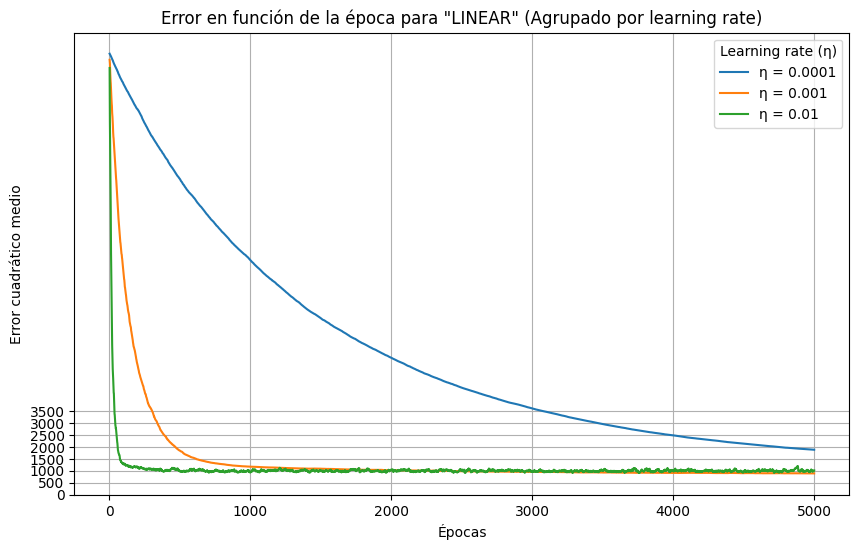

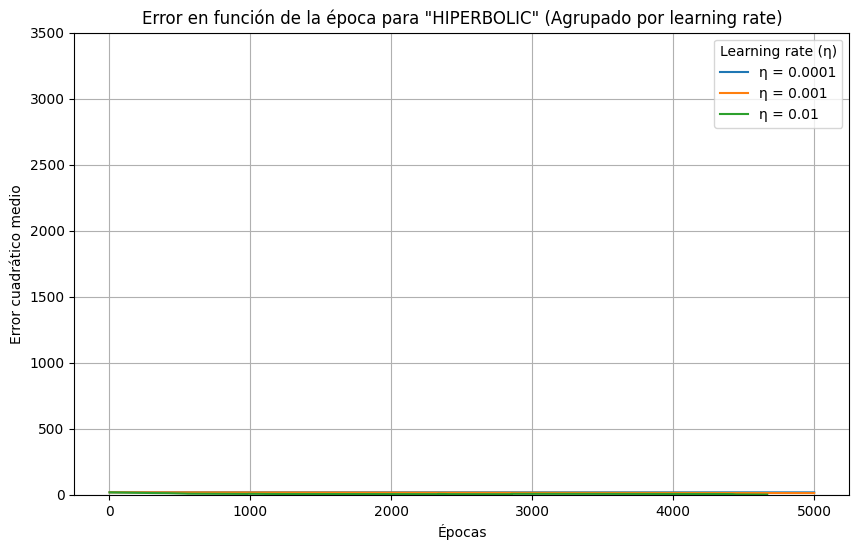

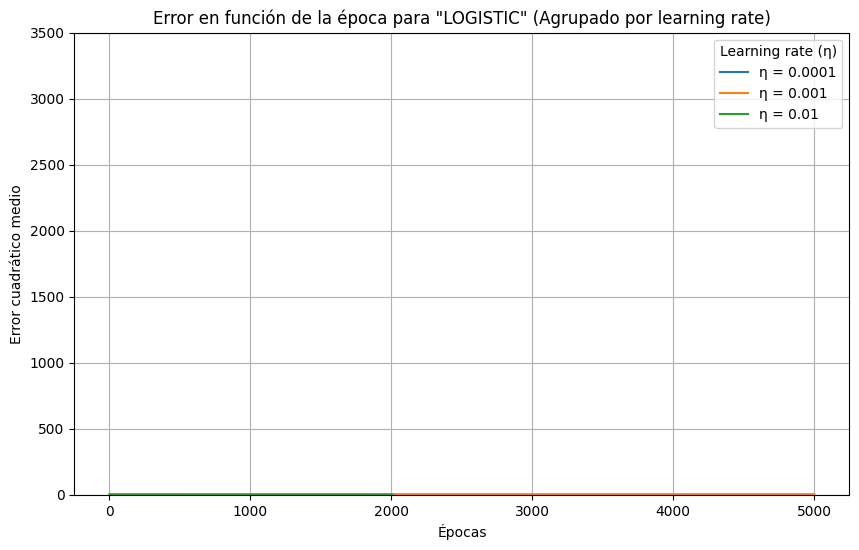

In [34]:
for perceptron_type in PERCEPTRON_TYPES:
    subset = df[df["perceptron_type"] == perceptron_type]
    
    plt.figure(figsize=(10, 6))

    for learning_rate in subset["learning_rate"].unique():
        lr_subset = subset[subset["learning_rate"] == learning_rate]
        mean_lr_subset = lr_subset.groupby("epoch")["mse"].mean()
        plt.plot(mean_lr_subset.index, mean_lr_subset, label="η = " + str(learning_rate))

    plt.yticks(range(0, 4000, 500))
    plt.xlabel('Épocas')
    plt.ylabel('Error cuadrático medio')
    plt.title(f'Error en función de la época para "{perceptron_type}" (Agrupado por learning rate)')
    plt.legend(title='Learning rate (η)')


    plt.grid(True)
    plt.show()

### Set de gráficos 2

Luego, analizar que pasa variando el training_percentage (0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9) para los diferentes tipos de perceptrones. Y de esta forma encontrar la mejor configuración para optimizar la capacidad de generalización del modelo.

Para ello, graficamos el error en función de la cantidad de épocas para cada configuración.

In [35]:
repeats = 10

result_list = []

for perceptron_type in PERCEPTRON_TYPES:
    configCopy = copy(config)
    configCopy["perceptron_type"] = perceptron_type

    for tp in [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
        configCopy["training_percentage"] = tp

        for run in range(1, repeats+1):
            epoch, mse = run_main(configCopy)

            for i in range(epoch):
                result_list.append({
                    "perceptron_type": perceptron_type,
                    "training_percentage": tp,
                    "mse": mse[i],
                    "epoch": i+1,
                })
            
df2 = pd.DataFrame(result_list)
df2.to_csv('data/set2.csv', index=False)

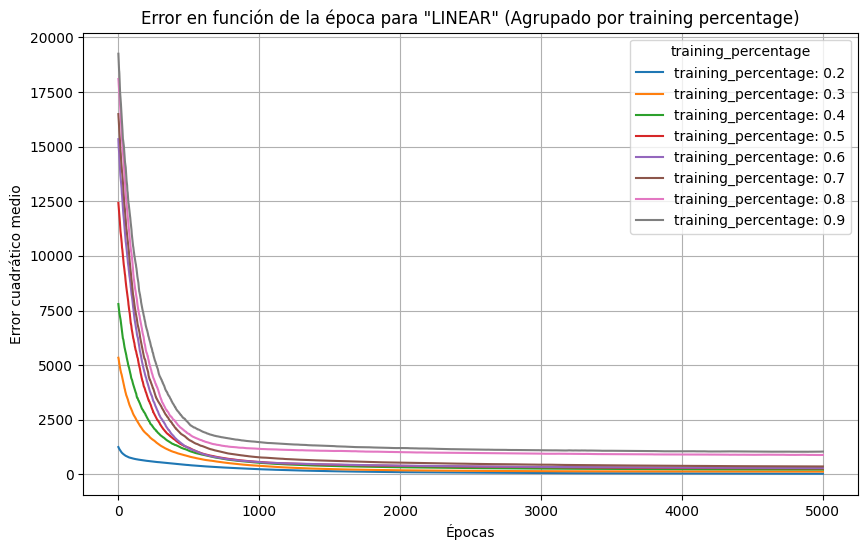

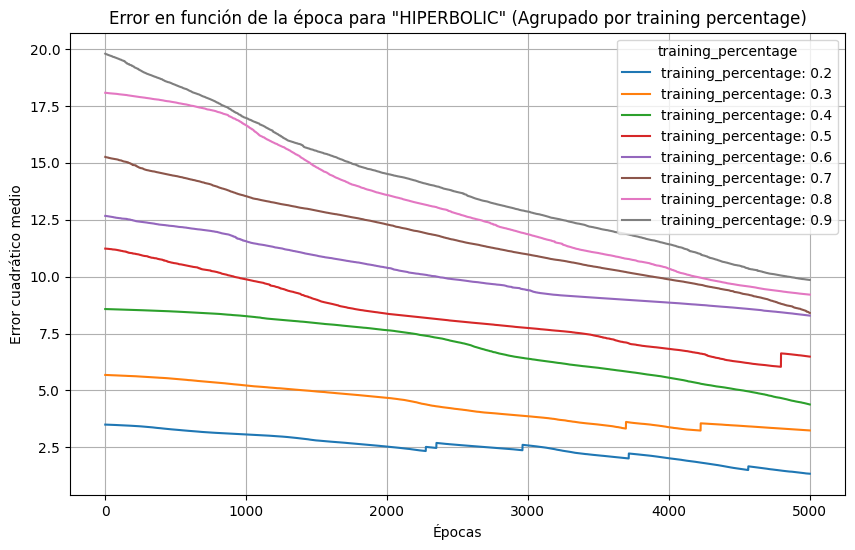

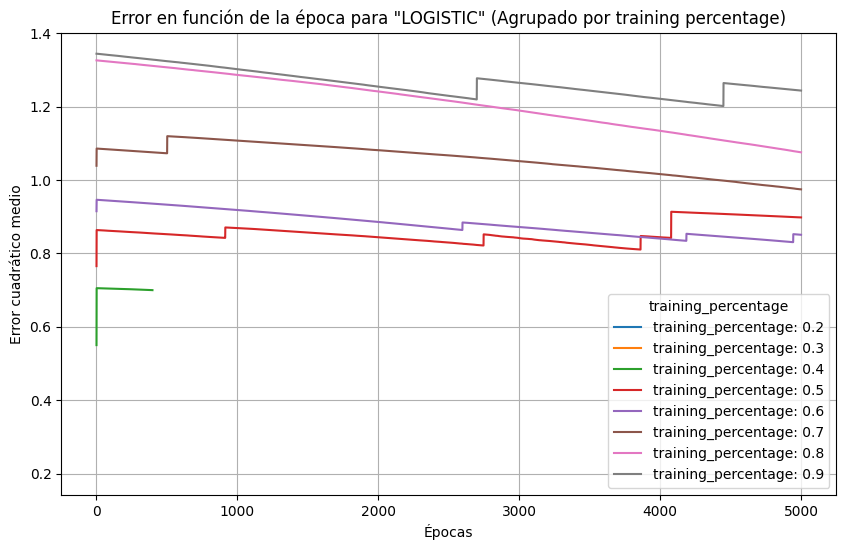

In [36]:
for perceptron_type in PERCEPTRON_TYPES:
    subset = df2[df2["perceptron_type"] == perceptron_type]
    
    plt.figure(figsize=(10, 6))

    for tp in subset["training_percentage"].unique():
        tp_subset = subset[subset["training_percentage"] == tp]
        mean_tp_subset = tp_subset.groupby("epoch")["mse"].mean()
        plt.plot(mean_tp_subset.index, mean_tp_subset, label="training_percentage: " + str(tp))

    # plt.yticks(range(0, 4000, 500))
    plt.xlabel('Épocas')
    plt.ylabel('Error cuadrático medio')
    plt.title(f'Error en función de la época para "{perceptron_type}" (Agrupado por training percentage)')
    plt.legend(title='training_percentage')


    plt.grid(True)
    plt.show()